#  State Aggregation on the 1000-state Random Walk

State aggregation is a simple form of generalizing function approximation in which states are grouped together, with 1 estimated value (1 component of the weight vector $\mathbf{w}$) for each group.
- The value of a state is estimated as its group’s component, and when the state is updated, that component alone is updated.
- State aggregation is a special case of SGD (9.7) in which the gradient, $\nabla \^v(S_{t}, \mathbf{w}_{t})$, is:
  - 1 for $S_{t}$’s group’s component,
  - 0 for the other components.

Consider a 1000-state version of the random walk task.
- The states are numbered from 1 to 1000, left to right, and all episodes begin near the center, in state 500.
- State transitions are from the current state to one of the 100 neighboring states to its left, or to one of the 100 neighboring states to its right, all with equal probability.
- Of course, if the current state is near an edge, then there may be fewer than 100 neighbors on that side of it.
  - In this case, all the probability that would have gone into those missing neighbors goes into the probability of terminating on that side (thus, state 1 has a 0.5 chance of terminating on the left, and state 950 has a 0.25 chance of terminating on the right).
  - As usual, termination on the left produces a reward of -1, and termination on the right produces a reward of +1.
  - All other transitions have a reward of 0.

In [1]:
from IPython.display import Image

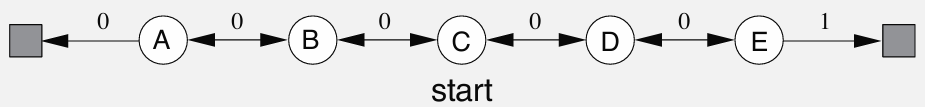

In [2]:
Image(filename="../book_images/Example_6_2_top.PNG")

- Figure 9.1 shows the true VF $v_{\pi}$ for this task.
  - It is nearly a straight line, curving very slightly toward the horizontal for the last 100 states at each end.
- Also shown is the final approximate VF learned by the gradient MC algorithm with state aggregation after 100,000 episodes with a step size of $\alpha = 2 \cdot 10^{-5}$.
- For the state aggregation, the 1000 states were partitioned into 10 groups of 100 states each (i.e., states 1–100 were one group, states 101–200 were another, and so on).
- The staircase effect  shown in the figure is typical of state aggregation; within each group, the approximate value is constant, and it changes abruptly from one group to the next.
- These approximate values are close to the global minimum of the $\overline{VE}$ (9.1).

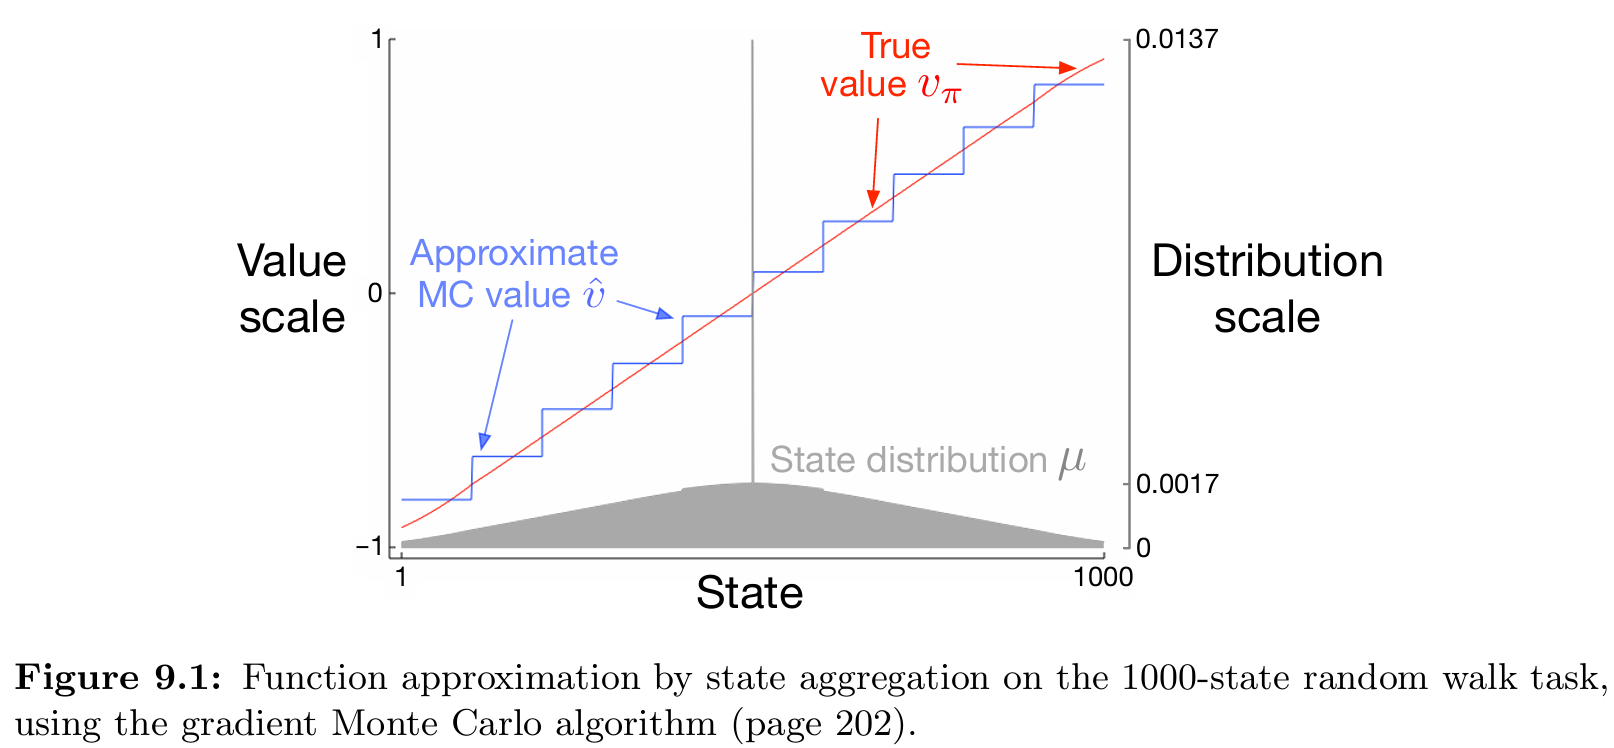

In [3]:
Image(filename="../book_images/Figure_9_1.PNG")

 Some of the details of the approximate values are best appreciated by reference to the state distribution $\mu$ for this task, shown in the lower portion of the figure with a right-side scale.
- State 500, in the center, is the 1st state of every episode, but is rarely visited again.
  - On average, about 1.37% of the time steps are spent in the start state.
- The states reachable in 1 step from the start state are the 2nd most visited, with about 0.17% of the time steps being spent in each of them.
  - From there $\mu$ falls off almost linearly, reaching about 0.0147% at the extreme states 1 and 1000.
- The most visible effect of the distribution is on the:
  - leftmost groups, whose values are clearly shifted higher than the unweighted average of the true values of states within the group,
  - rightmost groups, whose values are clearly shifted lower.
- This is due to the states in these areas having the greatest asymmetry in their weightings by $\mu$.
- For example, in the leftmost group, state 100 is weighted more than 3 times more strongly than state 1. Thus, the estimate for the group is biased toward the true value of state 100, which is higher than the true value of state 1.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [ ]:
from src.random_walk import compute_true_value, ValueFunction, states_number, states, gradient_monte_carlo

In [ ]:
# Compute the true values of states
true_values = compute_true_value()

In [ ]:
# Number of episodes
episodes = int(1e5)

# Step-size parameter
step_size = 2e-5

In [ ]:
# VF has 10 aggregations in this example, each aggregation has 100 states
value_function = ValueFunction(num_of_groups=10)

# Create an array for states distribution filled with 0s
states_distribution = np.zeros(states_number + 2)

for _ in tqdm(range(episodes)):
    gradient_monte_carlo(value_function, step_size, states_distribution)

In [ ]:
# Normalize the states distribution
states_distribution /= np.sum(states_distribution)

# Get the state values
state_values = [value_function.value(s) for s in states]

In [ ]:
# Plotting
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(states, state_values, label=r"Approximate MC value $\^v$")
plt.plot(states, true_values[1: -1], label=r"True value $v_{\pi}$")
plt.xlabel("State")
plt.ylabel("Value")
plt.legend()

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(states, states_distribution[1: -1], label=r"State distribution $\mu$")
plt.xlabel("State")
plt.ylabel("Distribution")
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_9_1.png")
plt.close()